# Data Wrangler

## Import The Library

In [15]:
import pandas as pd
from wordcloud import WordCloud

## Import The Dataset

In [2]:
dataset1 = pd.read_csv('raw_datasets/sqli.csv', index_col=False, encoding='utf-16')
dataset2 = pd.read_csv('raw_datasets/sqliv2.csv', index_col=False, encoding='utf-16')
dataset3 = pd.read_csv('raw_datasets/SQLiV3.csv', index_col=False, encoding='utf-8', usecols=['Sentence', 'Label'])
dataset = pd.concat([dataset1, dataset2, dataset3])
dataset.to_csv('processed_datasets/merged_sqli.csv', index=False)

In [3]:
dataset = pd.read_csv('processed_datasets/merged_sqli.csv', encoding='utf-8')

## Check The Dataset Health

In [4]:
# Count How Many Missing Values In Both Columns (287)
missing_values = dataset.isnull().sum()

# Count How Many Duplicate Values In 'Sentence' Column (11997)
duplicate_values = dataset[['Sentence']].duplicated().sum() 

# Count How Many Rows That Have Incorrect Label (310)
incorrect_label = dataset[(dataset['Label'] != "0") & (dataset['Label'] != "1")].shape[0]

## Clean The Dataset

In [5]:
# Drop Rows With Missing Values
dataset.dropna(axis=0, inplace=True)

# Drop Rows With Duplicate Values
dataset.drop_duplicates(subset='Sentence', inplace=True)

# Drop Rows With Incorrect Label
dataset = dataset[(dataset['Label'] == "0") | (dataset['Label'] == "1")]

# Change The Datatype Of Columns
dataset = dataset.astype({'Sentence': str, 'Label': int})

# Correct The Label
dataset.iloc[45296:, 1] = 1

## Export The Dataset

In [6]:
dataset.to_csv('processed_datasets/cleaned_sqli.csv', index=False)

## Distribution Of Labels

Total data points that belongs to label 1 is 33547 (59.27%)
Total data points that belongs to label 0 is 23056 (40.73%)


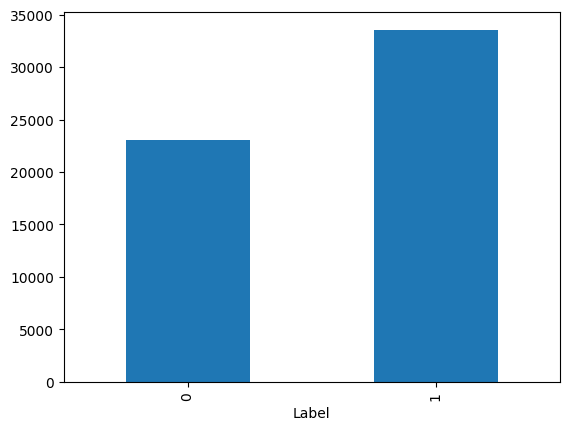

In [24]:
dataset.groupby('Label')['Label'].count().plot.bar()
print("Total data points that belongs to label 1 is {} ({}%)".format((dataset['Label'].value_counts()[1]), round((dataset['Label'].value_counts()[1] / dataset.shape[0]) * 100, 2)))
print("Total data points that belongs to label 0 is {} ({}%)".format((dataset['Label'].value_counts()[0]), round((dataset['Label'].value_counts()[0] / dataset.shape[0]) * 100, 2)))